In [3]:
#%matplotlib notebook
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import string

/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/2.7.13-SYSTEM/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


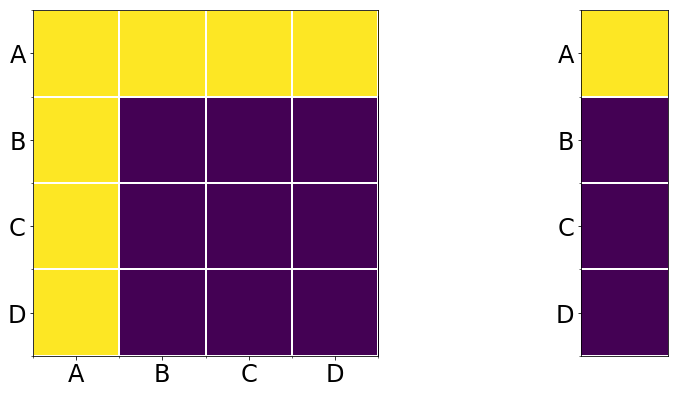

In [147]:
#%matplotlib inline
matplotlib.rcParams.update({'font.size': 24})
dims = (4,4) # Size of the grid.
nodes= list(string.ascii_uppercase)[:dims[0]]

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1)
ax.set_xticks(np.arange(dims[0]))
ax.set_xticklabels(nodes)
ax.set_yticks(np.arange(dims[1]))
ax.set_yticklabels(nodes)

ax.set_xticks(np.arange(-.5, dims[0], 1), minor=True)
ax.set_yticks(np.arange(-.5, dims[1], 1), minor=True)
ax.grid(linewidth=2,which='minor', color='w',)


ax2 = fig.add_subplot(1,2,2)
ax2.set_yticks(np.arange(dims[0]))
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

#ax2.set_xticks(np.arange(-.5, dims[0], 1), minor=True)
ax2.set_yticks(np.arange(-.5, dims[1], 1), minor=True)
ax2.set_yticklabels(nodes)
ax2.grid(linewidth=2,which='minor', color='w',)

fig.tight_layout()

def cross_filter(i):
    # Get 2D indexes from the frame number.
    idx0,idx1 = np.unravel_index([i], dims)
    
    # Clear the input.
    x = np.zeros(dims)
    # Cross-filter.
    x[idx0[0]:,idx1[0]] = 1
    x[idx1[0],idx0[0]:] = 1
    ax.imshow(x)
    
    # Show response.
    resp = np.zeros(dims_resp)
    resp[:i] = 0.3
    resp[i] = 1
    ax2.imshow(resp)
    
    
    

frames = dims[0] # How many iterations.
dims_resp = (dims[0],1) # Size of the output responses.

ani = matplotlib.animation.FuncAnimation(fig, cross_filter, frames=frames)
ani.save('animate_cross.gif', writer='imagemagick', fps=2)

In [48]:
import networkx as nx

In [128]:
d = 4
nodes= list(string.ascii_uppercase)[:d]
node_names = []
node_edges = []
for n in nodes:
    for m in nodes:
        node_edges.append([n,m])
        node_names.append(n+m)

In [129]:
?G.add_weighted_edges_from

In [130]:
?nx.draw_networkx

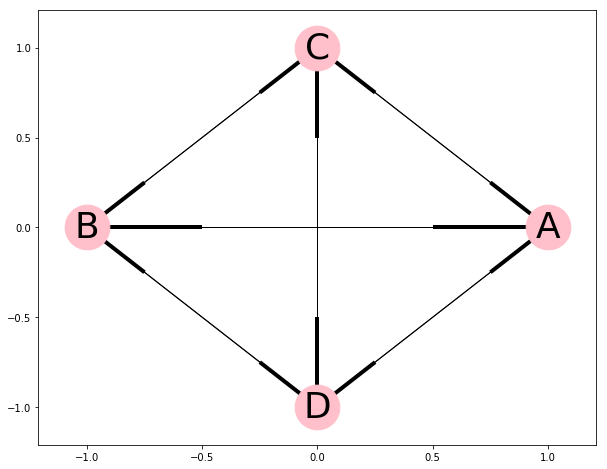

In [131]:
# http://stackoverflow.com/questions/29774105/how-to-represent-graphs-with-ipython
# http://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
%matplotlib inline
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_nodes_from(nodes)
G.add_edges_from(node_edges)

plt.figure(figsize=(10,8))
# Note there should be cycles here (e.g., A->A) that are not shown.
nx.draw_networkx(G, pos=nx.circular_layout(G), node_size=2000, node_color='pink', font_size=36)

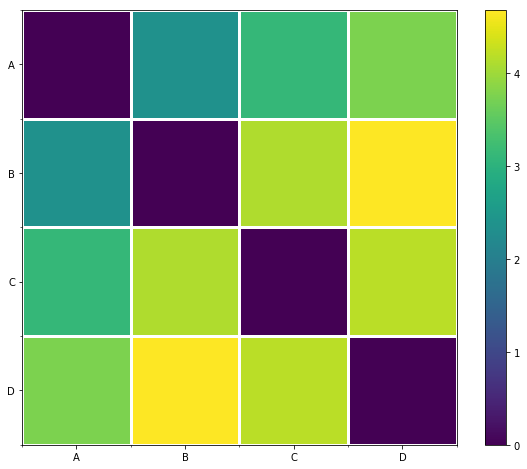

In [132]:
from numpy.random import RandomState
prng = RandomState(42)

C = np.abs(prng.randn(d, d))+1
np.fill_diagonal(C,0)
C = C + C.transpose()

plt.figure(figsize=(10,8))
plt.imshow(C, interpolation="None"); plt.colorbar()
plt.xticks(range(d), nodes, color='black');
plt.yticks(range(d), nodes, color='black');
ax = plt.gca();
# http://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow
ax.set_xticks(np.arange(-.5, d, 1), minor=True)
ax.set_yticks(np.arange(-.5, d, 1), minor=True)
#plt.xticks(np.arange(-.5, d, 1), nodes, color='black');
#plt.yticks(np.arange(-.5, d, 1), nodes, color='black');
ax.grid(which='minor', color='w', linewidth=3)
matplotlib.rcParams.update({'font.size': 36})

In [113]:
#x = np.copy(C)

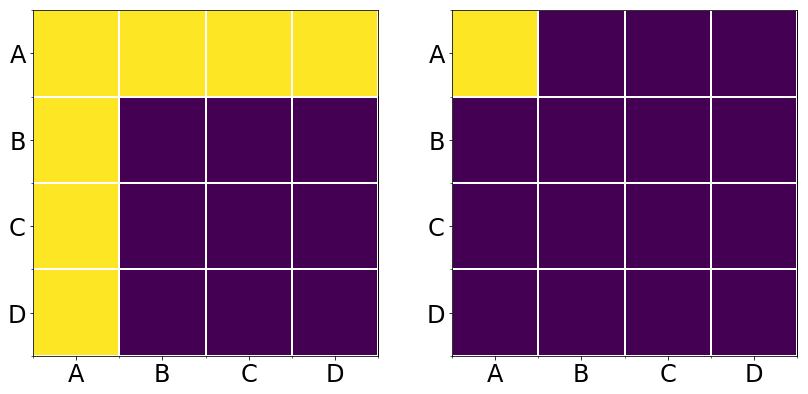

In [7]:
%matplotlib inline
# Sliding Cross.
matplotlib.rcParams.update({'font.size': 24})
dims = (4,4)
nodes= list(string.ascii_uppercase)[:dims[0]]

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1)
ax.set_xticks(np.arange(dims[0]))
ax.set_xticklabels(nodes)
ax.set_yticks(np.arange(dims[1]))
ax.set_yticklabels(nodes)

ax.set_xticks(np.arange(-.5, dims[0], 1), minor=True)
ax.set_yticks(np.arange(-.5, dims[1], 1), minor=True)
ax.grid(linewidth=2,which='minor', color='w',)


ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks(np.arange(dims[0]))
ax2.set_yticks(np.arange(dims[1]))
ax2.set_xticks(np.arange(-.5, dims[0], 1), minor=True)
ax2.set_yticks(np.arange(-.5, dims[1], 1), minor=True)
ax2.set_xticklabels(nodes)
ax2.set_yticklabels(nodes)
ax2.grid(linewidth=2,which='minor', color='w',)

fig.tight_layout()

frames = dims[0]*dims[1]
dims_resp = (dims)
resp = np.zeros(dims_resp)

def sliding_cross_filter(i):
    #x = np.random.randn(5,5)
    x = np.zeros(dims)
    idx0,idx1 = np.unravel_index([i], dims)
    x[:, idx1[0]] = 1
    x[idx0[0], :] = 1
    ax.imshow(x)
    
    #resp = np.zeros(dims_resp)
    resp[idx0[0], idx1[0]] = 1
    ax2.imshow(resp)
    resp[idx0[0], idx1[0]] = 0.3




ani = matplotlib.animation.FuncAnimation(fig, sliding_cross_filter, frames=frames)
ani.save('animate_sliding_cross.gif', writer='imagemagick', fps=3)

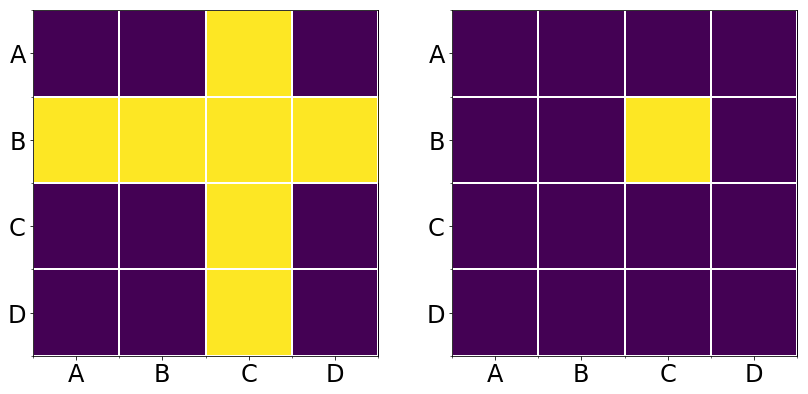

In [11]:
%matplotlib inline
# Sliding Cross.
matplotlib.rcParams.update({'font.size': 24})
dims = (4,4)
nodes= list(string.ascii_uppercase)[:dims[0]]

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1)
ax.set_xticks(np.arange(dims[0]))
ax.set_xticklabels(nodes)
ax.set_yticks(np.arange(dims[1]))
ax.set_yticklabels(nodes)

ax.set_xticks(np.arange(-.5, dims[0], 1), minor=True)
ax.set_yticks(np.arange(-.5, dims[1], 1), minor=True)
ax.grid(linewidth=2,which='minor', color='w',)


ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks(np.arange(dims[0]))
ax2.set_yticks(np.arange(dims[1]))
ax2.set_xticks(np.arange(-.5, dims[0], 1), minor=True)
ax2.set_yticks(np.arange(-.5, dims[1], 1), minor=True)
ax2.set_xticklabels(nodes)
ax2.set_yticklabels(nodes)
ax2.grid(linewidth=2,which='minor', color='w',)

fig.tight_layout()

frames = dims[0]*dims[1]
dims_resp = (dims)
resp = np.zeros(dims_resp)
sliding_cross_filter(6)